# Griffiths 2.11

## Problem statement
1. Compute  $\langle x\rangle$, $\langle x^2\rangle$, $\langle p\rangle$ and $\langle p^2\rangle$ for the states $\psi_0$ and $\psi_1$, by explicit integration. Comment: in this and other problems involving the harmonic oscillator it simplifies matters if you introduce the variable $\xi = \sqrt{(m\omega/\hbar)}x$ and the constant $\alpha = (m\omega/\pi\hbar)^{1/4}$
2. Check the uncertainty principle for these states.
3. Compute $\langle T\rangle$ (the average kinetic energy) and $\langle V\rangle$ (the average potential energy) for these states. Is their sum what you would expect?


----
## Solution
Equation 2.59 is
$$\psi_0(x) = (m\omega/\pi\hbar)^{1/4}e^{-m\omega x^2/2\hbar}$$
Equation 2.62 is 
$$\psi_1(x) = (m\omega/\pi\hbar)^{1/4}\sqrt{(2m\omega/\hbar)}xe^{-m\omega x^2/2\hbar}$$

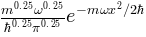

In [2]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
sp.init_printing()

m, w = sp.symbols('m omega', real=True, positive=True)
x, t = sp.symbols('x t')

# define psi_0...
psi_0 = (m*w/sp.pi/hbar)**(1/4)*sp.exp(-m*w*x**2/2/hbar)
psi_0

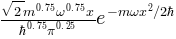

In [3]:
# define psi_1
psi_1 = (m*w/sp.pi/hbar)**(1/4)*sp.sqrt(2*m*w/hbar)*x*sp.exp(-m*w*x**2/2/hbar)
psi_1

Next, we can do integral to calculate the expectation values

In [4]:
#expectation values of x
psi_0expectvx = sp.integrate(sp.conjugate(psi_0)*x*psi_0, (x, -sp.oo, sp.oo))
psi_1expectvx = sp.integrate(sp.conjugate(psi_1)*x*psi_1, (x, -sp.oo, sp.oo))
#expectation values of x^2
psi_0expectvx2 = sp.integrate(sp.conjugate(psi_0)*x**2*psi_0, (x, -sp.oo, sp.oo))
psi_1expectvx2 = sp.integrate(sp.conjugate(psi_1)*x**2*psi_1, (x, -sp.oo, sp.oo))

### Expectation values

In [5]:
psi_0expectvx

In [6]:
psi_1expectvx

In [7]:
psi_0expectvx2

In [8]:
psi_1expectvx2

Take the dirivative of $\langle x\rangle$ with respect to time to get $\langle p\rangle$

In [9]:
#expectation values of p
psi_0expectvp = m*sp.diff(psi_0expectvx, t)
psi_1expectvp = m*sp.diff(psi_1expectvx, t)

In [10]:
psi_0expectvp

In [11]:
psi_1expectvp

To calculate $\langle p^2\rangle$, we need to use the momentum operator

In [12]:
psi_0expectvp2 = -hbar**2*sp.integrate(sp.conjugate(psi_0)*sp.diff(psi_0, x, 2), (x, -sp.oo, sp.oo))
psi_1expectvp2 = -hbar**2*sp.integrate(sp.conjugate(psi_1)*sp.diff(psi_1, x, 2), (x, -sp.oo, sp.oo))

### The expectation values are

In [20]:
psi_0expectvp2

In [21]:
psi_1expectvp2

### Check the uncertainty principle


In [22]:
psi_0sigma_x = sp.sqrt(psi_0expectvx2 - psi_0expectvx**2)
psi_0sigma_p = sp.sqrt(psi_0expectvp2 - psi_0expectvp**2)
psi_1sigma_x = sp.sqrt(psi_1expectvx2 - psi_1expectvx**2)
psi_1sigma_p = sp.sqrt(psi_1expectvp2 - psi_1expectvp**2)

In [23]:
psi_0sigma_x*psi_0sigma_p

In [24]:
psi_1sigma_x*psi_1sigma_p

Both of the results are equal to or greater than $\hbar/2$

Use the equation $ T = p^2/2m$ to calculate $\langle T\rangle$
Use the equation $V(x) = m\omega^2x^2/2$ to calculate $\langle V\rangle$

In [25]:
psi_0expectvT = (1/(2*m))*psi_0expectvp2
psi_1expectvT = (1/(2*m))*psi_1expectvp2
psi_0expectvV = (1/2)*m*w**2*psi_0expectvx2
psi_1expectvV = (1/2)*m*w**2*psi_1expectvx2

In [26]:
psi_0expectvT

In [27]:
psi_1expectvT

In [28]:
psi_0expectvV

In [29]:
psi_1expectvV

### The Sumation of  $\langle T\rangle$ and  $\langle V\rangle$ is expected to equal to  $\langle H\rangle$, the expectation value of the total energy. Use Hamiltonian operator to calculate $\langle H\rangle$

In [31]:
psi_0totalE =  sp.integrate(sp.conjugate(psi_0)*(((-hbar**2)/(2*m))*sp.diff(psi_0, x, 2) + (1/2)*m*w**2*x**2*psi_0), (x, -sp.oo, sp.oo))
psi_1totalE =  sp.integrate(sp.conjugate(psi_1)*(((-hbar**2)/(2*m))*sp.diff(psi_1, x, 2) + (1/2)*m*w**2*x**2*psi_1), (x, -sp.oo, sp.oo))

In [32]:
psi_0totalE

In [33]:
psi_1totalE

In [36]:
sp.simplify(psi_0expectvT+psi_0expectvV)

This is equal to the expectation value of the total energy in state $\psi_0$

In [37]:
sp.simplify(psi_1expectvT+psi_1expectvV)

This is equal to the expectation value of the total energy in state $\psi_1$

This result is consistent with what we expect

----
## Portfolio references
* Problem 1.3, 1.5, 1.9, 1.17, 2.4

## Index terms
* Wavefunction
* uncertainty principle
* Schrodinger equation
* expectation value
* momentum operator
* Hamiltonian operator

## Book references
* eq 2.59 eq 2.62 eq 2.13

## External references